In [1]:
import numpy as np
import timeit
import matplotlib.pyplot as plt

Function to compute variance using the LH equation
---
This first calculates the mean, and then does the sum of the square of the differences.

In [2]:
def mean(x):
    mean = 0
    n = x.size
    for i in range(n):
        mean += x[i]
    return mean / n

def var_slow(x):
    m = mean(x)
    n = x.size
    var = 0
    for i in range(n):
        var += (x[i] - m)**2
    return var

Function to compute variance using the RH equation
---
This uses the formula derived in part 1 of the APS

In [3]:
def var_fast(x):
    n = x.size
    # Store running totals
    totalsq = 0
    total = 0
    for i in range(n):
        thisx = x[i]
        totalsq += thisx**2
        total += thisx
    return totalsq - total**2 / n

Do performance comparison
---
Runs the slow, fast, and numpy versions of variance 100 times each on each data size, and then averages the times taken.

In [4]:
ns = 2**np.arange(15)
slow_times = []
fast_times = []
np_times = []
for n in ns:
    x = np.random.rand(n)
    
    t = timeit.timeit('var_slow(x)', globals=globals(), number=100)
    slow_times.append(t)
    
    t = timeit.timeit('var_fast(x)', globals=globals(), number=100)
    fast_times.append(t)
    
    t = timeit.timeit('np.var(x)', globals=globals(), number=100)
    np_times.append(t)

Plot performance comparision
---

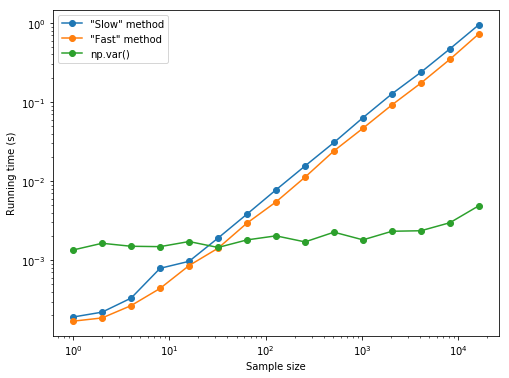

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.loglog()
ax.plot(ns, slow_times, marker='o', label='"Slow" method')
ax.plot(ns, fast_times, marker='o', label='"Fast" method')
ax.plot(ns, np_times, marker='o', label='np.var()')
ax.legend()
ax.set_xlabel('Sample size')
ax.set_ylabel('Running time (s)');